In [2]:
import os
import pandas as pd

In [269]:
zip_folder_path = "B:/zip_file.zip"

# Specify the directory where you want to extract the contents
extracted_dir = "B:/txt_reviews"

# Unzip the contents of the zip file folder
with zipfile.ZipFile(zip_folder_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)  

In [49]:
content = open(r"B:\txt_reviews\review_{i}.txt",'r', encoding = 'utf-8')
content.readlines()

In [53]:
content.readlines()

['ProductId: B00813GRG4\n',
 'UserId: A1D87F6ZCVE5NK\n',
 'ProfileName: dll pa\n',
 'HelpfulnessNumerator: 0\n',
 'HelpfulnessDenominator: 0\n',
 'Score: 1\n',
 'Time: 1346976000\n',
 'ReviewSummary: Not as Advertised\n',
 'ReviewText: Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".\n']

In [69]:
import os
import pandas as pd
text_files_directory = "B:/txt_reviews"

file_names = []
file_contents = []

for filename in os.listdir(text_files_directory):
    if filename.endswith(".txt"):
        file_path = os.path.join(text_files_directory, filename)

        with open(file_path, 'r', encoding='utf-8') as file:
            file_name = os.path.splitext(filename)[0] 
            content = file.read()
            
            file_names.append(file_name)
            file_contents.append(content)

# Create a DataFrame
df = pd.DataFrame({'File Name': file_names, 'File Content': file_contents})

# Display the DataFrame
df.head()


,File Name,File Content
0,review_10,ProductId: B00171APVA\nUserId: A21BT40VZCCYT4\...
1,review_100,ProductId: B0019CW0HE\nUserId: A2P6ACFZ8FTNVV\...
2,review_1000,ProductId: B006F2NYI2\nUserId: A132DJVI37RB4X\...
3,review_10000,ProductId: B000P41A28\nUserId: A82WIMR4RSVLI\n...
4,review_100000,ProductId: B000LQORDE\nUserId: A19W47CXJJP1MI\...


In [132]:
len(df['File Name'])

568453

In [3]:
import re

In [111]:
df['File Content'][0]

'ProductId: B00171APVA\nUserId: A21BT40VZCCYT4\nProfileName: Carol A. Reed\nHelpfulnessNumerator: 0\nHelpfulnessDenominator: 0\nScore: 5\nTime: 1351209600\nReviewSummary: Healthy Dog Food\nReviewText: This is a very healthy dog food. Good for their digestion. Also good for small puppies. My dog eats her required amount at every feeding.\n'

In [ ]:
# re.findall(r"Good:(.*)\nBad:",reviews)

In [147]:
re.findall(r"ProductId: (.*)\nUserId:",df['File Content'][0])

['B00171APVA']

In [204]:
regex = r"ProductId: (.*)\nUserId:"
df['ProductId'] = df['File Content'].apply(lambda x: re.findall(regex,x)[0])

In [206]:
df['ProductId']

0         B00171APVA
1         B0019CW0HE
2         B006F2NYI2
3         B000P41A28
4         B000LQORDE
             ...    
568448    B000LQORDE
568449    B000LQORDE
568450    B000LQORDE
568451    B000LQORDE
568452    B000LQORDE
Name: ProductId, Length: 568453, dtype: object

In [196]:
# UserId=[]
# for i in df['File Content']:
#     ab=re.findall(r"UserId: (.*)\nProfileName:",df['File Content'][8])
#     UserId.append(ab)

In [202]:
regex = r"UserId: (.*)\nProfileName:"
df['Userid'] = df['File Content'].apply(lambda x: re.findall(regex,x)[0])

In [203]:
df['Userid']

0         A21BT40VZCCYT4
1         A2P6ACFZ8FTNVV
2         A132DJVI37RB4X
3          A82WIMR4RSVLI
4         A19W47CXJJP1MI
               ...      
568448     AL22WN8RBBOW7
568449    A2P7HIRYYWVOBD
568450    A1K0ZH5MQFBA77
568451    A29FRN2O7LWINL
568452     A9Q950IPXJR1D
Name: Userid, Length: 568453, dtype: object

In [220]:
df['ProfileName'][1]

'Melissa Benjamin'

In [211]:
regex = r"ProfileName: (.*)\nHelpfulnessNumerator:"
df['ProfileName'] = df['File Content'].apply(lambda x: re.findall(regex,x)[0])

In [212]:
df['ProfileName']

0                   Carol A. Reed
1                Melissa Benjamin
2                       Scottdrum
3                      Emrose mom
4              Amazonian Consumer
                   ...           
568448      LifeInTheCity "trogg"
568449                      Mason
568450                 jennilight
568451                    T. Tsai
568452    Lynda "casual customer"
Name: ProfileName, Length: 568453, dtype: object

In [235]:
regex = r"HelpfulnessNumerator: (.*)\nHelpfulnessDenominator:"
df['HelpfulnessNumerator'] = df['File Content'].apply(lambda x: re.findall(regex,x)[0])

In [236]:
df['HelpfulnessNumerator']

0         0
1         0
2         2
3         0
4         2
         ..
568448    2
568449    2
568450    2
568451    2
568452    2
Name: HelpfulnessNumerator, Length: 568453, dtype: object

In [237]:
regex = r"HelpfulnessDenominator: (.*)\nScore:"
df['HelpfulnessDenominator'] = df['File Content'].apply(lambda x: re.findall(regex,x)[0])

In [238]:
df['HelpfulnessDenominator']

0         0
1         1
2         5
3         1
4         5
         ..
568448    5
568449    5
568450    5
568451    5
568452    5
Name: HelpfulnessDenominator, Length: 568453, dtype: object

In [240]:
regex = r"Score: (.*)\nTime:"
df['Score'] = df['File Content'].apply(lambda x: re.findall(regex,x)[0])

In [241]:
df['Score']

0         5
1         1
2         2
3         4
4         5
         ..
568448    5
568449    5
568450    4
568451    5
568452    4
Name: Score, Length: 568453, dtype: object

In [242]:
regex = r"Time: (.*)\nReviewSummary:"
df['Time'] = df['File Content'].apply(lambda x: re.findall(regex,x)[0])

In [243]:
df['Time']

0         1351209600
1         1331164800
2         1332374400
3         1337472000
4         1235088000
             ...    
568448    1256428800
568449    1254096000
568450    1250985600
568451    1237766400
568452    1237161600
Name: Time, Length: 568453, dtype: object

In [244]:
regex = r"ReviewSummary: (.*)\nReviewText:"
df['ReviewSummary'] = df['File Content'].apply(lambda x: re.findall(regex,x)[0])

In [245]:
df['ReviewSummary']

0                                          Healthy Dog Food
1                                                       Bad
2                                     Not hot, not habanero
3                                The best weve tried so far
4         This spicy noodle cures my cold, upset stomach...
                                ...                        
568448                                           Good Stuff
568449                                               yummy!
568450                                    Tastes like More!
568451                                          Great ramen
568452                                              Spicy!!
Name: ReviewSummary, Length: 568453, dtype: object

In [247]:
regex = r"ReviewText: (.*)\n"
df['ReviewText'] = df['File Content'].apply(lambda x: re.findall(regex,x)[0])

In [248]:
df['ReviewText']

0         This is a very healthy dog food. Good for thei...
1         I fed this to my Golden Retriever and he hated...
2         I have to admit, I was a sucker for the large ...
3         We have a 7 week old... He had gas and constip...
4         I love this noodle and have it once or twice a...
                                ...                        
568448    I love these noodle.  A little to spicy for th...
568449    I just love it and will buy another box when I...
568450    My late father in law used to have a rating sy...
568451    This is my favorite brand of Korean ramen. It ...
568452    I do like these noodles although, to say they ...
Name: ReviewText, Length: 568453, dtype: object

In [221]:
df['File Content'][1]

"ProductId: B0019CW0HE\nUserId: A2P6ACFZ8FTNVV\nProfileName: Melissa Benjamin\nHelpfulnessNumerator: 0\nHelpfulnessDenominator: 1\nScore: 1\nTime: 1331164800\nReviewSummary: Bad\nReviewText: I fed this to my Golden Retriever and he hated it.  He wouldn't eat it, and when he did, it gave him terrible diarrhea.  We will not be buying this again.  It's also super expensive.\n"

In [257]:
final_df=pd.DataFrame({"ProductId":df["ProductId"],"UserId":df['Userid'],"ProfileName":df['ProfileName']
                       ,"HelpfulnessNumerator":df['HelpfulnessNumerator'],"HelpfulnessDenominator":df['HelpfulnessDenominator'],
                      "Score":df['Score'],"Time":df['Time'],"ReviewSummary":df['ReviewSummary'],"ReviewText":df['ReviewText']})

In [258]:
final_df

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText
0,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...
1,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,1,1331164800,Bad,I fed this to my Golden Retriever and he hated...
2,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,2,1332374400,"Not hot, not habanero","I have to admit, I was a sucker for the large ..."
3,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,4,1337472000,The best weve tried so far,We have a 7 week old... He had gas and constip...
4,B000LQORDE,A19W47CXJJP1MI,Amazonian Consumer,2,5,5,1235088000,"This spicy noodle cures my cold, upset stomach...",I love this noodle and have it once or twice a...
...,...,...,...,...,...,...,...,...,...
568448,B000LQORDE,AL22WN8RBBOW7,"LifeInTheCity ""trogg""",2,5,5,1256428800,Good Stuff,I love these noodle. A little to spicy for th...
568449,B000LQORDE,A2P7HIRYYWVOBD,Mason,2,5,5,1254096000,yummy!,I just love it and will buy another box when I...
568450,B000LQORDE,A1K0ZH5MQFBA77,jennilight,2,5,4,1250985600,Tastes like More!,My late father in law used to have a rating sy...
568451,B000LQORDE,A29FRN2O7LWINL,T. Tsai,2,5,5,1237766400,Great ramen,This is my favorite brand of Korean ramen. It ...


In [259]:
final_df.to_csv("TextDataProject.csv")

In [13]:
final_df=pd.read_csv("TextDataProject.csv")

In [14]:
final_df=final_df.drop("Unnamed: 0",axis=1)

In [15]:
final_df

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText
0,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...
1,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,1,1331164800,Bad,I fed this to my Golden Retriever and he hated...
2,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,2,1332374400,"Not hot, not habanero","I have to admit, I was a sucker for the large ..."
3,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,4,1337472000,The best weve tried so far,We have a 7 week old... He had gas and constip...
4,B000LQORDE,A19W47CXJJP1MI,Amazonian Consumer,2,5,5,1235088000,"This spicy noodle cures my cold, upset stomach...",I love this noodle and have it once or twice a...
...,...,...,...,...,...,...,...,...,...
568448,B000LQORDE,AL22WN8RBBOW7,"LifeInTheCity ""trogg""",2,5,5,1256428800,Good Stuff,I love these noodle. A little to spicy for th...
568449,B000LQORDE,A2P7HIRYYWVOBD,Mason,2,5,5,1254096000,yummy!,I just love it and will buy another box when I...
568450,B000LQORDE,A1K0ZH5MQFBA77,jennilight,2,5,4,1250985600,Tastes like More!,My late father in law used to have a rating sy...
568451,B000LQORDE,A29FRN2O7LWINL,T. Tsai,2,5,5,1237766400,Great ramen,This is my favorite brand of Korean ramen. It ...


In [16]:
final_df.insert(0, 'Id', range(1,len(final_df)+1))

In [17]:
final_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText
0,1,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...
1,2,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,1,1331164800,Bad,I fed this to my Golden Retriever and he hated...
2,3,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,2,1332374400,"Not hot, not habanero","I have to admit, I was a sucker for the large ..."
3,4,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,4,1337472000,The best weve tried so far,We have a 7 week old... He had gas and constip...
4,5,B000LQORDE,A19W47CXJJP1MI,Amazonian Consumer,2,5,5,1235088000,"This spicy noodle cures my cold, upset stomach...",I love this noodle and have it once or twice a...
...,...,...,...,...,...,...,...,...,...,...
568448,568449,B000LQORDE,AL22WN8RBBOW7,"LifeInTheCity ""trogg""",2,5,5,1256428800,Good Stuff,I love these noodle. A little to spicy for th...
568449,568450,B000LQORDE,A2P7HIRYYWVOBD,Mason,2,5,5,1254096000,yummy!,I just love it and will buy another box when I...
568450,568451,B000LQORDE,A1K0ZH5MQFBA77,jennilight,2,5,4,1250985600,Tastes like More!,My late father in law used to have a rating sy...
568451,568452,B000LQORDE,A29FRN2O7LWINL,T. Tsai,2,5,5,1237766400,Great ramen,This is my favorite brand of Korean ramen. It ...


In [18]:
final_df.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
ReviewSummary             object
ReviewText                object
dtype: object

In [19]:
final_df['HelpfulnessNumerator']=final_df['HelpfulnessNumerator'].astype('int')

In [20]:
final_df['HelpfulnessDenominator']=final_df['HelpfulnessDenominator'].astype('int')

In [21]:
final_df['Score']=final_df['Score'].astype('int')

In [22]:
final_df.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int32
HelpfulnessDenominator     int32
Score                      int32
Time                       int64
ReviewSummary             object
ReviewText                object
dtype: object

In [23]:
final_df[final_df.duplicated()]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText


In [ ]:
# Helpfulness (fraction of users who found the review helpful) = HelpfulnessNumerator / HelpfulnessDenominator

In [25]:
final_df.insert(6, 'Helpfulness', final_df['HelpfulnessNumerator']/final_df['HelpfulnessDenominator'])

In [26]:
final_df['Helpfulness'].value_counts()

1.000000    183308
0.000000     33774
0.500000     21623
0.666667     10514
0.750000      6364
             ...  
0.754717         1
0.978078         1
0.697674         1
0.067669         1
0.970000         1
Name: Helpfulness, Length: 951, dtype: int64

In [28]:
final_df['Helpfulness'].isnull().sum()

270052

In [29]:
final_df['Helpfulness'].median()

1.0

In [30]:
final_df['Helpfulness']=final_df['Helpfulness'].fillna(final_df['Helpfulness'].median())

In [32]:
final_df['ProfileName']=final_df['ProfileName'].fillna(final_df['ProfileName'].mode()[0])
final_df['ReviewSummary']=final_df['ReviewSummary'].fillna(final_df['ReviewSummary'].mode()[0])

In [33]:
final_df.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Helpfulness               0
Score                     0
Time                      0
ReviewSummary             0
ReviewText                0
dtype: int64

In [34]:
final_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Helpfulness,Score,Time,ReviewSummary,ReviewText
0,1,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,1.0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...
1,2,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,0.0,1,1331164800,Bad,I fed this to my Golden Retriever and he hated...
2,3,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,0.4,2,1332374400,"Not hot, not habanero","I have to admit, I was a sucker for the large ..."
3,4,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,0.0,4,1337472000,The best weve tried so far,We have a 7 week old... He had gas and constip...
4,5,B000LQORDE,A19W47CXJJP1MI,Amazonian Consumer,2,5,0.4,5,1235088000,"This spicy noodle cures my cold, upset stomach...",I love this noodle and have it once or twice a...
...,...,...,...,...,...,...,...,...,...,...,...
568448,568449,B000LQORDE,AL22WN8RBBOW7,"LifeInTheCity ""trogg""",2,5,0.4,5,1256428800,Good Stuff,I love these noodle. A little to spicy for th...
568449,568450,B000LQORDE,A2P7HIRYYWVOBD,Mason,2,5,0.4,5,1254096000,yummy!,I just love it and will buy another box when I...
568450,568451,B000LQORDE,A1K0ZH5MQFBA77,jennilight,2,5,0.4,4,1250985600,Tastes like More!,My late father in law used to have a rating sy...
568451,568452,B000LQORDE,A29FRN2O7LWINL,T. Tsai,2,5,0.4,5,1237766400,Great ramen,This is my favorite brand of Korean ramen. It ...


In [35]:
final_df['Combine_Review']= final_df['ReviewSummary'] +' ' + final_df['ReviewText']

In [37]:
final_df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Helpfulness,Score,Time,ReviewSummary,ReviewText,Combine_Review
0,1,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,1.0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...,Healthy Dog Food This is a very healthy dog fo...
1,2,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,0.0,1,1331164800,Bad,I fed this to my Golden Retriever and he hated...,Bad I fed this to my Golden Retriever and he h...
2,3,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,0.4,2,1332374400,"Not hot, not habanero","I have to admit, I was a sucker for the large ...","Not hot, not habanero I have to admit, I was a..."
3,4,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,0.0,4,1337472000,The best weve tried so far,We have a 7 week old... He had gas and constip...,The best weve tried so far We have a 7 week ol...
4,5,B000LQORDE,A19W47CXJJP1MI,Amazonian Consumer,2,5,0.4,5,1235088000,"This spicy noodle cures my cold, upset stomach...",I love this noodle and have it once or twice a...,"This spicy noodle cures my cold, upset stomach..."


In [38]:
final_df.to_csv("NLP_Project.csv")

In [2]:
final_df=pd.read_csv("NLP_Project.csv")

In [3]:
final_df=final_df.drop("Unnamed: 0",axis=1)

In [4]:
final_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Helpfulness,Score,Time,ReviewSummary,ReviewText,Combine_Review
0,1,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,1.0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...,Healthy Dog Food This is a very healthy dog fo...
1,2,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,0.0,1,1331164800,Bad,I fed this to my Golden Retriever and he hated...,Bad I fed this to my Golden Retriever and he h...
2,3,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,0.4,2,1332374400,"Not hot, not habanero","I have to admit, I was a sucker for the large ...","Not hot, not habanero I have to admit, I was a..."
3,4,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,0.0,4,1337472000,The best weve tried so far,We have a 7 week old... He had gas and constip...,The best weve tried so far We have a 7 week ol...
4,5,B000LQORDE,A19W47CXJJP1MI,Amazonian Consumer,2,5,0.4,5,1235088000,"This spicy noodle cures my cold, upset stomach...",I love this noodle and have it once or twice a...,"This spicy noodle cures my cold, upset stomach..."
...,...,...,...,...,...,...,...,...,...,...,...,...
568448,568449,B000LQORDE,AL22WN8RBBOW7,"LifeInTheCity ""trogg""",2,5,0.4,5,1256428800,Good Stuff,I love these noodle. A little to spicy for th...,Good Stuff I love these noodle. A little to s...
568449,568450,B000LQORDE,A2P7HIRYYWVOBD,Mason,2,5,0.4,5,1254096000,yummy!,I just love it and will buy another box when I...,yummy! I just love it and will buy another box...
568450,568451,B000LQORDE,A1K0ZH5MQFBA77,jennilight,2,5,0.4,4,1250985600,Tastes like More!,My late father in law used to have a rating sy...,Tastes like More! My late father in law used t...
568451,568452,B000LQORDE,A29FRN2O7LWINL,T. Tsai,2,5,0.4,5,1237766400,Great ramen,This is my favorite brand of Korean ramen. It ...,Great ramen This is my favorite brand of Korea...


In [12]:
from nltk.tokenize import sent_tokenize, word_tokenize
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob,Word

In [13]:
ps=PorterStemmer()
lemmatize=WordNetLemmatizer()

In [41]:
# corpus=[]
# for i in range(0,len(final_df)):
#     view=re.sub(r'[^A-Za-z]',' ',final_df['Combine_Review'][i])
#     view=view.lower()
#     view=view.split()
#     view=[ps.stem(word)for word in view if word not in set(stopwords.words('english'))]
#     view=' '.join(view)
#     corpus.append(view)

<AxesSubplot:>

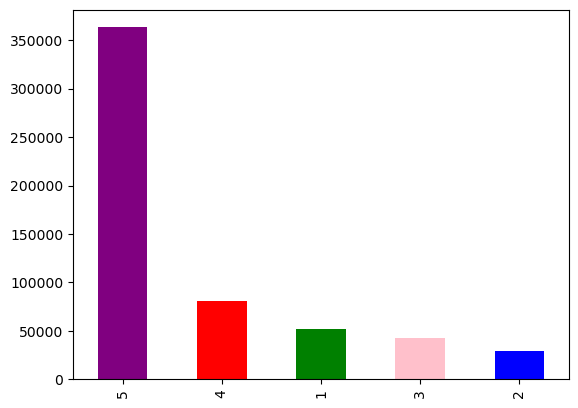

In [76]:
final_df["Score"].value_counts().sort_values(ascending=False).plot(kind="bar",color=['purple','red','green','pink','blue'])

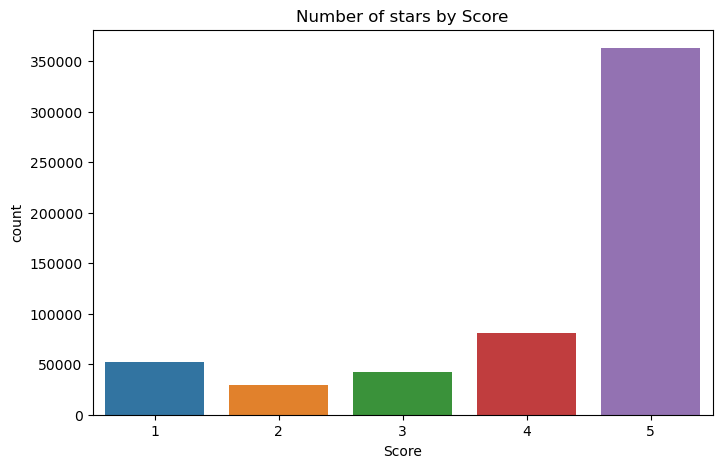

In [77]:
plt.figure(figsize=(8,5))
sns.countplot(x="Score",data=final_df)
plt.title("Number of stars by Score")
plt.show()

In [4]:
from nltk.tokenize import sent_tokenize, word_tokenize
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob,Word

In [5]:
from tqdm import tqdm, tqdm_notebook

In [6]:
tqdm.pandas()

In [7]:
import re

In [19]:
lemmatize=WordNetLemmatizer()

In [15]:
def clean_text(doc, stem=False):
    # Removing Special Characters
    doc = re.sub(r'[^A-z0-9 ]','',doc)
    doc = re.sub(r'_','',doc)
    # Convert to Lowercase
    doc = doc.lower()
    # Split the document into tokens
    doc_list = doc.split()
    # Correct the Spellings and removing stop words
    doc_list = [word for word in doc_list if word not in stopwords.words('english')]
    #doc_list = [str(TextBlob(word).correct()) for word in doc_list if word not in sw]
    # Convert to Singularize
    #doc_list = [str(Word(word).singularize()) for word in doc_list]
    
    return " ".join(doc_list)

In [16]:
final_df['Text_cleaned_lemma'] = final_df['Combine_Review'].progress_apply(clean_text)

100%|████████████████████████████████████████████████████████████████████████| 568453/568453 [4:57:30<00:00, 31.85it/s]


In [ ]:
final_df['Text_cleaned_stem'] = final_df['Text'].progress_apply(clean_text, stem=True)

In [17]:
final_df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Helpfulness,Score,Time,ReviewSummary,ReviewText,Combine_Review,Text_cleaned_lemma
0,1,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,1.0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...,Healthy Dog Food This is a very healthy dog fo...,healthy dog food healthy dog food good digesti...
1,2,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,0.0,1,1331164800,Bad,I fed this to my Golden Retriever and he hated...,Bad I fed this to my Golden Retriever and he h...,bad fed golden retriever hated wouldnt eat gav...
2,3,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,0.4,2,1332374400,"Not hot, not habanero","I have to admit, I was a sucker for the large ...","Not hot, not habanero I have to admit, I was a...",hot habanero admit sucker large quantity 12 oz...
3,4,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,0.0,4,1337472000,The best weve tried so far,We have a 7 week old... He had gas and constip...,The best weve tried so far We have a 7 week ol...,best weve tried far 7 week old gas constipatio...
4,5,B000LQORDE,A19W47CXJJP1MI,Amazonian Consumer,2,5,0.4,5,1235088000,"This spicy noodle cures my cold, upset stomach...",I love this noodle and have it once or twice a...,"This spicy noodle cures my cold, upset stomach...",spicy noodle cures cold upset stomach headache...


In [1]:
import numpy as np
import pandas as pd

In [2]:
final_df=pd.read_csv("NLP_Text_Project.csv")
final_df=final_df.drop("Unnamed: 0",axis=1)
final_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Helpfulness,Score,Time,ReviewSummary,ReviewText,Combine_Review,Text_cleaned_lemma
0,1,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,1.0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...,Healthy Dog Food This is a very healthy dog fo...,healthy dog food healthy dog food good digesti...
1,2,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,0.0,1,1331164800,Bad,I fed this to my Golden Retriever and he hated...,Bad I fed this to my Golden Retriever and he h...,bad fed golden retriever hated wouldnt eat gav...
2,3,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,0.4,2,1332374400,"Not hot, not habanero","I have to admit, I was a sucker for the large ...","Not hot, not habanero I have to admit, I was a...",hot habanero admit sucker large quantity 12 oz...
3,4,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,0.0,4,1337472000,The best weve tried so far,We have a 7 week old... He had gas and constip...,The best weve tried so far We have a 7 week ol...,best weve tried far 7 week old gas constipatio...
4,5,B000LQORDE,A19W47CXJJP1MI,Amazonian Consumer,2,5,0.4,5,1235088000,"This spicy noodle cures my cold, upset stomach...",I love this noodle and have it once or twice a...,"This spicy noodle cures my cold, upset stomach...",spicy noodle cures cold upset stomach headache...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
568448,568449,B000LQORDE,AL22WN8RBBOW7,"LifeInTheCity ""trogg""",2,5,0.4,5,1256428800,Good Stuff,I love these noodle. A little to spicy for th...,Good Stuff I love these noodle. A little to s...,good stuff love noodle little spicy wife perfct
568449,568450,B000LQORDE,A2P7HIRYYWVOBD,Mason,2,5,0.4,5,1254096000,yummy!,I just love it and will buy another box when I...,yummy! I just love it and will buy another box...,yummy love buy another box im done last one
568450,568451,B000LQORDE,A1K0ZH5MQFBA77,jennilight,2,5,0.4,4,1250985600,Tastes like More!,My late father in law used to have a rating sy...,Tastes like More! My late father in law used t...,tastes like late father law used rating system...
568451,568452,B000LQORDE,A29FRN2O7LWINL,T. Tsai,2,5,0.4,5,1237766400,Great ramen,This is my favorite brand of Korean ramen. It ...,Great ramen This is my favorite brand of Korea...,great ramen favorite brand korean ramen spicy ...


## DATA SPLIT INTO TRAIN AND TEST

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train,X_test, Y_train,Y_test = train_test_split(final_df['Text_cleaned_lemma'], final_df['Score'],\
                                                 test_size=0.3, random_state=100)

In [5]:
X_train

322272    nice small recieved item day packaging looks r...
460045    dog loves things bully sticks expensive store ...
242230    disappointed longer making exact coffee beats ...
410766    expected bought flavor since buying plain macc...
354214    save money really hoping would decent reading ...
                                ...                        
344414    tastes like wood shavings least favorite kueri...
212912    good warehoused well ive ordered many kind bar...
65615     best tea best tea market ordering yearsboth ca...
210755    excellent gf mix excellent gf bread mix use ma...
56088     beats swiss miss mile ive tried commercial bra...
Name: Text_cleaned_lemma, Length: 397917, dtype: object

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv=TfidfVectorizer()

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [9]:
X_train_processed_bow = cv.fit_transform(X_train)
X_train_processed_tfidf = tv.fit_transform(X_train)

In [10]:
X_train_processed_bow

<397917x207621 sparse matrix of type '<class 'numpy.int64'>'
	with 14492805 stored elements in Compressed Sparse Row format>

In [11]:
X_train_processed_tfidf

<397917x207621 sparse matrix of type '<class 'numpy.float64'>'
	with 14492805 stored elements in Compressed Sparse Row format>

In [12]:
from sys import getsizeof

In [13]:
getsizeof(X_train_processed_tfidf)

48

In [14]:
X_test_processed_bow = cv.transform(X_test)
X_test_processed_tfidf = tv.transform(X_test)

In [15]:
X_test_processed_bow

<170536x207621 sparse matrix of type '<class 'numpy.int64'>'
	with 6159836 stored elements in Compressed Sparse Row format>

In [16]:
X_test_processed_tfidf

<170536x207621 sparse matrix of type '<class 'numpy.float64'>'
	with 6159836 stored elements in Compressed Sparse Row format>

# BUILDING THE MODEL

#  MULTINOMIAL_NB ALGORITHM USING BAG OF WORDS

In [33]:
from sklearn.naive_bayes import MultinomialNB

In [17]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, recall_score

In [35]:
mnb=MultinomialNB()
mnb.fit(X_train_processed_bow,Y_train)

MultinomialNB()

In [36]:
y_pred_mnb=mnb.predict(X_test_processed_bow)
y_pred_mnb

array([5, 4, 5, ..., 4, 3, 5], dtype=int64)

In [37]:
accuracy_score(Y_test,y_pred_mnb)

0.7361905990523995

In [39]:
confusion_matrix(Y_test,y_pred_mnb)

array([[ 10715,    706,    906,    703,   2720],
       [  2209,   1534,   1446,   1275,   2423],
       [  1500,    281,   3769,   3132,   3942],
       [   885,     90,    819,   9394,  12877],
       [  1697,    143,    666,   6569, 100135]], dtype=int64)

In [40]:
pd.crosstab(Y_test, y_pred_mnb, rownames=['Actual'], colnames=['Predicted'])

Predicted,1,2,3,4,5
Actual,,,,,
1,10715,706,906,703,2720
2,2209,1534,1446,1275,2423
3,1500,281,3769,3132,3942
4,885,90,819,9394,12877
5,1697,143,666,6569,100135


# DECISION TREE ALGORITHM USING BAG OF WORDS

In [24]:
%%time
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train_processed_bow,Y_train)

Wall time: 1h 10min 31s


DecisionTreeClassifier()

In [25]:
%%time
y_pred_dtc=dtc.predict(X_test_processed_bow)
y_pred_dtc

Wall time: 533 ms


array([5, 4, 5, ..., 5, 1, 5], dtype=int64)

In [28]:
accuracy_score(Y_test,y_pred_dtc)

0.7634223858891964

In [29]:
confusion_matrix(Y_test,y_pred_dtc)

array([[10253,   996,   875,   828,  2798],
       [ 1337,  4032,   841,   728,  1949],
       [ 1007,   693,  6316,  1526,  3082],
       [  808,   613,  1320, 12213,  9111],
       [ 2156,  1260,  2109,  6308, 97377]], dtype=int64)

In [30]:
pd.crosstab(Y_test, y_pred_dtc, rownames=['Actual'], colnames=['Predicted'])

Predicted,1,2,3,4,5
Actual,,,,,
1,10253,996,875,828,2798
2,1337,4032,841,728,1949
3,1007,693,6316,1526,3082
4,808,613,1320,12213,9111
5,2156,1260,2109,6308,97377


# RANDOM FOREST ALGORITHM USING BAG OF WORDS

In [17]:
%%time
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_jobs=-1)
rfc.fit(X_train_processed_bow,Y_train)

Wall time: 2h 23min 11s


RandomForestClassifier(n_jobs=-1)

In [19]:
%%time
y_pred_rfc=rfc.predict(X_test_processed_bow)
y_pred_rfc

Wall time: 1min 20s


array([5, 5, 5, ..., 5, 1, 5], dtype=int64)

In [22]:
accuracy_score(Y_test,y_pred_rfc)

0.7965063095182249

In [23]:
confusion_matrix(Y_test,y_pred_rfc)

array([[  8896,     13,     26,     17,   6798],
       [   474,   3410,     93,     35,   4875],
       [   157,     15,   5082,    121,   7249],
       [    42,      3,     48,   9335,  14637],
       [    38,      0,     11,     51, 109110]], dtype=int64)

In [24]:
pd.crosstab(Y_test, y_pred_rfc, rownames=['Actual'], colnames=['Predicted'])

Predicted,1,2,3,4,5
Actual,,,,,
1,8896,13,26,17,6798
2,474,3410,93,35,4875
3,157,15,5082,121,7249
4,42,3,48,9335,14637
5,38,0,11,51,109110


# LOGISTIC REGRESION ALGORITHM USING BAG OF WORDS

In [25]:
%%time
from sklearn.linear_model import LogisticRegression
lrc=LogisticRegression(n_jobs=-1)
lrc.fit(X_train_processed_bow,Y_train)

Wall time: 1min 31s
Parser   : 137 ms


LogisticRegression(n_jobs=-1)

In [27]:
%%time
y_pred_lrc=lrc.predict(X_test_processed_bow)
y_pred_lrc

Wall time: 111 ms


array([5, 5, 5, ..., 4, 2, 5], dtype=int64)

In [28]:
accuracy_score(Y_test,y_pred_lrc)

0.76946803021063

In [29]:
confusion_matrix(Y_test,y_pred_lrc)

array([[ 11585,   1281,    715,    282,   1887],
       [  2237,   3115,   1387,    545,   1603],
       [  1190,   1143,   5320,   1843,   3128],
       [   485,    443,   1712,   8213,  13212],
       [   934,    395,   1073,   3819, 102989]], dtype=int64)

In [30]:
pd.crosstab(Y_test, y_pred_lrc, rownames=['Actual'], colnames=['Predicted'])

Predicted,1,2,3,4,5
Actual,,,,,
1,11585,1281,715,282,1887
2,2237,3115,1387,545,1603
3,1190,1143,5320,1843,3128
4,485,443,1712,8213,13212
5,934,395,1073,3819,102989


# K-NEAREST NEIGHBORS ALGORITHM USING BAG OF WORDS

In [31]:
%%time
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier()
knc.fit(X_train_processed_bow,Y_train)

Wall time: 677 ms


KNeighborsClassifier()

In [32]:
%%time
y_pred_knc=knc.predict(X_test_processed_bow)
y_pred_knc

Wall time: 59min 47s


array([5, 4, 5, ..., 1, 5, 5], dtype=int64)

In [33]:
accuracy_score(Y_test,y_pred_knc)

0.7194844490312896

In [34]:
confusion_matrix(Y_test,y_pred_knc)

array([[  6139,    459,    478,    599,   8075],
       [   789,   2651,    396,    547,   4504],
       [   654,    433,   3899,    924,   6714],
       [   594,    351,    724,   7728,  14668],
       [  1339,    674,   1110,   3806, 102281]], dtype=int64)

In [35]:
pd.crosstab(Y_test, y_pred_knc, rownames=['Actual'], colnames=['Predicted'])

Predicted,1,2,3,4,5
Actual,,,,,
1,6139,459,478,599,8075
2,789,2651,396,547,4504
3,654,433,3899,924,6714
4,594,351,724,7728,14668
5,1339,674,1110,3806,102281


# `MULTINOMIALNB ALGORITHM USING TF-IDF`

In [17]:
%%time
from sklearn.naive_bayes import MultinomialNB
mnb_tfidf=MultinomialNB()
mnb_tfidf.fit(X_train_processed_tfidf,Y_train)

Wall time: 468 ms


MultinomialNB()

In [18]:
y_pred_mnb_tfidf=mnb_tfidf.predict(X_test_processed_tfidf)
y_pred_mnb_tfidf

array([5, 5, 5, ..., 5, 5, 5], dtype=int64)

In [19]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, recall_score,classification_report

In [20]:
accu_mnb=accuracy_score(Y_test,y_pred_mnb_tfidf)
accu_mnb

0.6474937843036075

In [21]:
confusion_matrix(Y_test,y_pred_mnb_tfidf)

array([[  1016,      0,      0,      3,  14731],
       [    52,     11,      2,      2,   8820],
       [    19,      0,     19,      6,  12580],
       [     9,      0,      0,    182,  23874],
       [     9,      1,      0,      7, 109193]], dtype=int64)

In [22]:
pd.crosstab(Y_test, y_pred_mnb_tfidf, rownames=['Actual'], colnames=['Predicted'])

Predicted,1,2,3,4,5
Actual,,,,,
1,1016,0,0,3,14731
2,52,11,2,2,8820
3,19,0,19,6,12580
4,9,0,0,182,23874
5,9,1,0,7,109193


In [23]:
print(classification_report(Y_test,y_pred_mnb_tfidf))

              precision    recall  f1-score   support

           1       0.92      0.06      0.12     15750
           2       0.92      0.00      0.00      8887
           3       0.90      0.00      0.00     12624
           4       0.91      0.01      0.02     24065
           5       0.65      1.00      0.78    109210

    accuracy                           0.65    170536
   macro avg       0.86      0.21      0.19    170536
weighted avg       0.74      0.65      0.52    170536



In [22]:
from matplotlib import pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Score', ylabel='Count'>

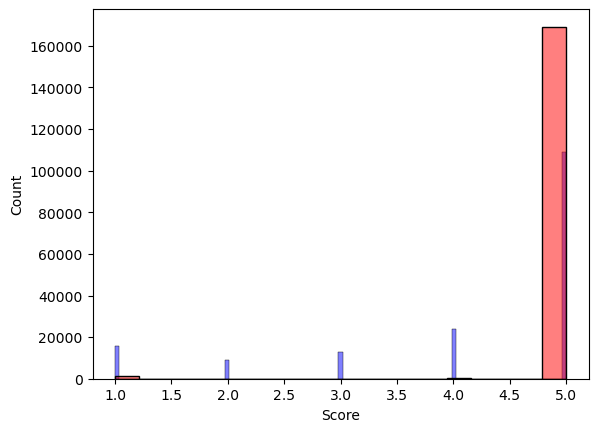

In [25]:
sns.histplot(Y_test,color='blue',alpha=0.5)
sns.histplot(y_pred_mnb_tfidf,color='red',alpha=0.5)

# DECISION TREE ALGORITHM USING TF-IDF

In [27]:
%%time
from sklearn.tree import DecisionTreeClassifier
dtc_tfidf=DecisionTreeClassifier()
dtc_tfidf.fit(X_train_processed_tfidf,Y_train)

Wall time: 2h 1min 46s


DecisionTreeClassifier()

In [28]:
y_pred_dtc_tfidf=dtc_tfidf.predict(X_test_processed_tfidf)
y_pred_dtc_tfidf

array([5, 3, 5, ..., 4, 1, 5], dtype=int64)

In [29]:
accu_dtc=accuracy_score(Y_test,y_pred_dtc_tfidf)
accu_dtc

0.7554182108176573

In [30]:
confusion_matrix(Y_test,y_pred_dtc_tfidf)

array([[10169,  1114,   950,   813,  2704],
       [ 1251,  4102,   828,   752,  1954],
       [  990,   727,  6306,  1473,  3128],
       [  871,   661,  1403, 12504,  8626],
       [ 2291,  1379,  2530,  7265, 95745]], dtype=int64)

In [31]:
pd.crosstab(Y_test, y_pred_dtc_tfidf, rownames=['Actual'], colnames=['Predicted'])

Predicted,1,2,3,4,5
Actual,,,,,
1,10169,1114,950,813,2704
2,1251,4102,828,752,1954
3,990,727,6306,1473,3128
4,871,661,1403,12504,8626
5,2291,1379,2530,7265,95745


In [32]:
print(classification_report(Y_test,y_pred_dtc_tfidf))

              precision    recall  f1-score   support

           1       0.65      0.65      0.65     15750
           2       0.51      0.46      0.49      8887
           3       0.52      0.50      0.51     12624
           4       0.55      0.52      0.53     24065
           5       0.85      0.88      0.87    109210

    accuracy                           0.76    170536
   macro avg       0.62      0.60      0.61    170536
weighted avg       0.75      0.76      0.75    170536



<AxesSubplot:xlabel='Score', ylabel='Count'>

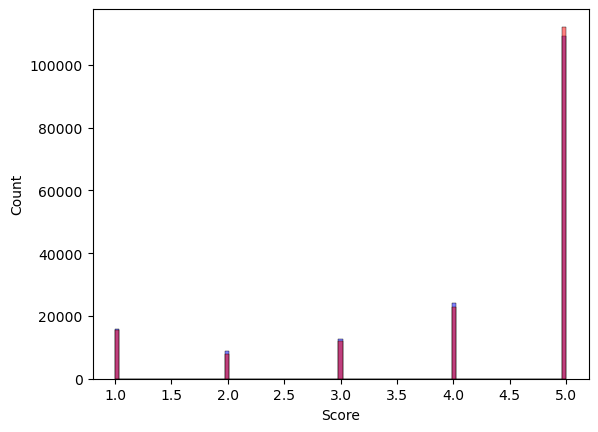

In [36]:
sns.histplot(Y_test,color='blue',alpha=0.5)
sns.histplot(y_pred_dtc_tfidf,color='red',alpha=0.5)

# RANDOM FOREST ALGORITHM USING TF-IDF

In [17]:
%%time
from sklearn.ensemble import RandomForestClassifier
rfc_tfidf=RandomForestClassifier()
rfc_tfidf.fit(X_train_processed_tfidf,Y_train)

Wall time: 4h 1min 1s


RandomForestClassifier()

In [18]:
y_pred_rfc_tfidf=rfc_tfidf.predict(X_test_processed_tfidf)
y_pred_rfc_tfidf

array([5, 5, 5, ..., 5, 1, 5], dtype=int64)

In [19]:
accu_rfc=accuracy_score(Y_test,y_pred_rfc_tfidf)
accu_rfc

0.7949113383684383

In [20]:
confusion_matrix(Y_test,y_pred_rfc_tfidf)

array([[  8702,     10,     23,      8,   7007],
       [   417,   3402,     76,     19,   4973],
       [   154,     11,   5066,     81,   7312],
       [    42,      3,     32,   9262,  14726],
       [    33,      0,     12,     36, 109129]], dtype=int64)

In [21]:
pd.crosstab(Y_test, y_pred_rfc_tfidf, rownames=['Actual'], colnames=['Predicted'])

Predicted,1,2,3,4,5
Actual,,,,,
1,8702,10,23,8,7007
2,417,3402,76,19,4973
3,154,11,5066,81,7312
4,42,3,32,9262,14726
5,33,0,12,36,109129


<AxesSubplot:xlabel='Score', ylabel='Count'>

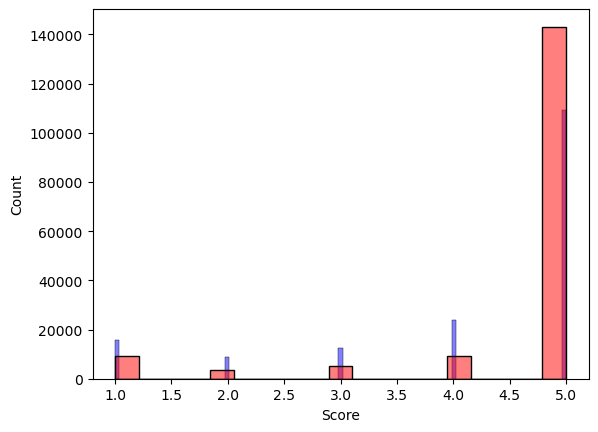

In [23]:
sns.histplot(Y_test,color='blue',alpha=0.5)
sns.histplot(y_pred_rfc_tfidf,color='red',alpha=0.5)

# LOGISTIC REGRESION ALGORITHM USING TF-IDF

In [25]:
%%time
from sklearn.linear_model import LogisticRegression
lr_tfidf=LogisticRegression()
lr_tfidf.fit(X_train_processed_tfidf,Y_train)

B:\Data Science doc\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Wall time: 1min 33s


LogisticRegression()

In [26]:
y_pred_lr_tfidf=lr_tfidf.predict(X_test_processed_tfidf)
y_pred_lr_tfidf

array([5, 4, 5, ..., 4, 2, 5], dtype=int64)

In [27]:
accu_lr=accuracy_score(Y_test,y_pred_lr_tfidf)
accu_lr

0.7595698268987193

In [28]:
confusion_matrix(Y_test,y_pred_lr_tfidf)

array([[ 11430,   1158,    553,    266,   2343],
       [  2395,   2638,   1295,    590,   1969],
       [  1233,   1088,   4455,   2069,   3779],
       [   522,    338,   1411,   7313,  14481],
       [   898,    268,    744,   3602, 103698]], dtype=int64)

In [29]:
pd.crosstab(Y_test, y_pred_lr_tfidf, rownames=['Actual'], colnames=['Predicted'])

Predicted,1,2,3,4,5
Actual,,,,,
1,11430,1158,553,266,2343
2,2395,2638,1295,590,1969
3,1233,1088,4455,2069,3779
4,522,338,1411,7313,14481
5,898,268,744,3602,103698


<AxesSubplot:xlabel='Score', ylabel='Count'>

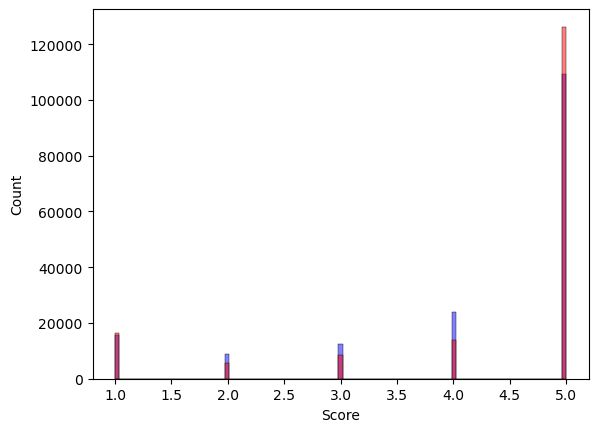

In [30]:
sns.histplot(Y_test,color='blue',alpha=0.5)
sns.histplot(y_pred_lr_tfidf,color='red',alpha=0.5)

# K-NEAREST NEIGHBORS ALGORITHM USING TF-IDF

In [18]:
%%time
from sklearn.neighbors import KNeighborsClassifier
knc_tfidf=KNeighborsClassifier()
knc_tfidf.fit(X_train_processed_tfidf,Y_train)

Wall time: 3.66 s


KNeighborsClassifier()

In [ ]:
%%time
y_pred_knc_tfidf=knc_tfidf.predict(X_test_processed_tfidf)
y_pred_knc_tfidf

In [ ]:
accu_knc=accuracy_score(Y_test,y_pred_knc_tfidf)
accu_knc

In [ ]:
confusion_matrix(Y_test,y_pred_knc_tfidf)

In [ ]:
pd.crosstab(Y_test, y_pred_knc_tfidf, rownames=['Actual'], colnames=['Predicted'])

In [ ]:
sns.histplot(Y_test,color='blue',alpha=0.5)
sns.histplot(y_pred_knc_tfidf,color='red',alpha=0.5)

In [ ]:
X_train_processed_tfidf,Y_train,X_test_processed_tfidf

In [42]:
# from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import MultinomialNB
# import xgboost as xgb


In [9]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud

In [51]:
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
# !pip install ydata-profiling